In [1]:
###################environment###################
#data preprocessing
import pandas as pd
import numpy as np
import statistics
#split training and testing
from sklearn.model_selection import train_test_split
#data visualization tool
import seaborn as sns
#plot
import matplotlib.pyplot as plt
#CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

###################environment###################

In [2]:
cancer = pd.read_csv('dataR2.csv')
cancer0 = pd.read_csv('dataR2.csv')

#資料前處理
cancer.head()

# 1 -> Healthy
# 2 -> Patients

y0 = cancer['Classification']

cancer['Classification'] = pd.cut(x=cancer['Classification'],
                     bins=[0,1.1,2.1],
                     labels=['Healthy', 'Patients'])

## EDA


In [72]:
#資料型態與敘述統計
cancer.info()
cancer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             116 non-null    int64   
 1   BMI             116 non-null    float64 
 2   Glucose         116 non-null    int64   
 3   Insulin         116 non-null    float64 
 4   HOMA            116 non-null    float64 
 5   Leptin          116 non-null    float64 
 6   Adiponectin     116 non-null    float64 
 7   Resistin        116 non-null    float64 
 8   MCP.1           116 non-null    float64 
 9   Classification  116 non-null    category
dtypes: category(1), float64(7), int64(2)
memory usage: 8.5 KB


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000


In [3]:
#病患人數比例圓餅圖
cancer['Classification'].value_counts()

plt.rcParams['font.sans-serif'] = ['Songti TC Regular']
import plotly.express as px
 
counts = list(cancer['Classification'].value_counts())
category = ['健康者(Healthy)', '病患(Patients)']
 
fig = px.pie(values=counts, names=category)
fig.update_traces(textposition='inside', 
                  textinfo='percent+label+value',
                  marker=dict(line=dict(color='#FFFFFF', width=2)),
                  textfont_size=13)

fig.update_layout(title_text='資料中病患比例及人數', title_x=0.5)
 
fig.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


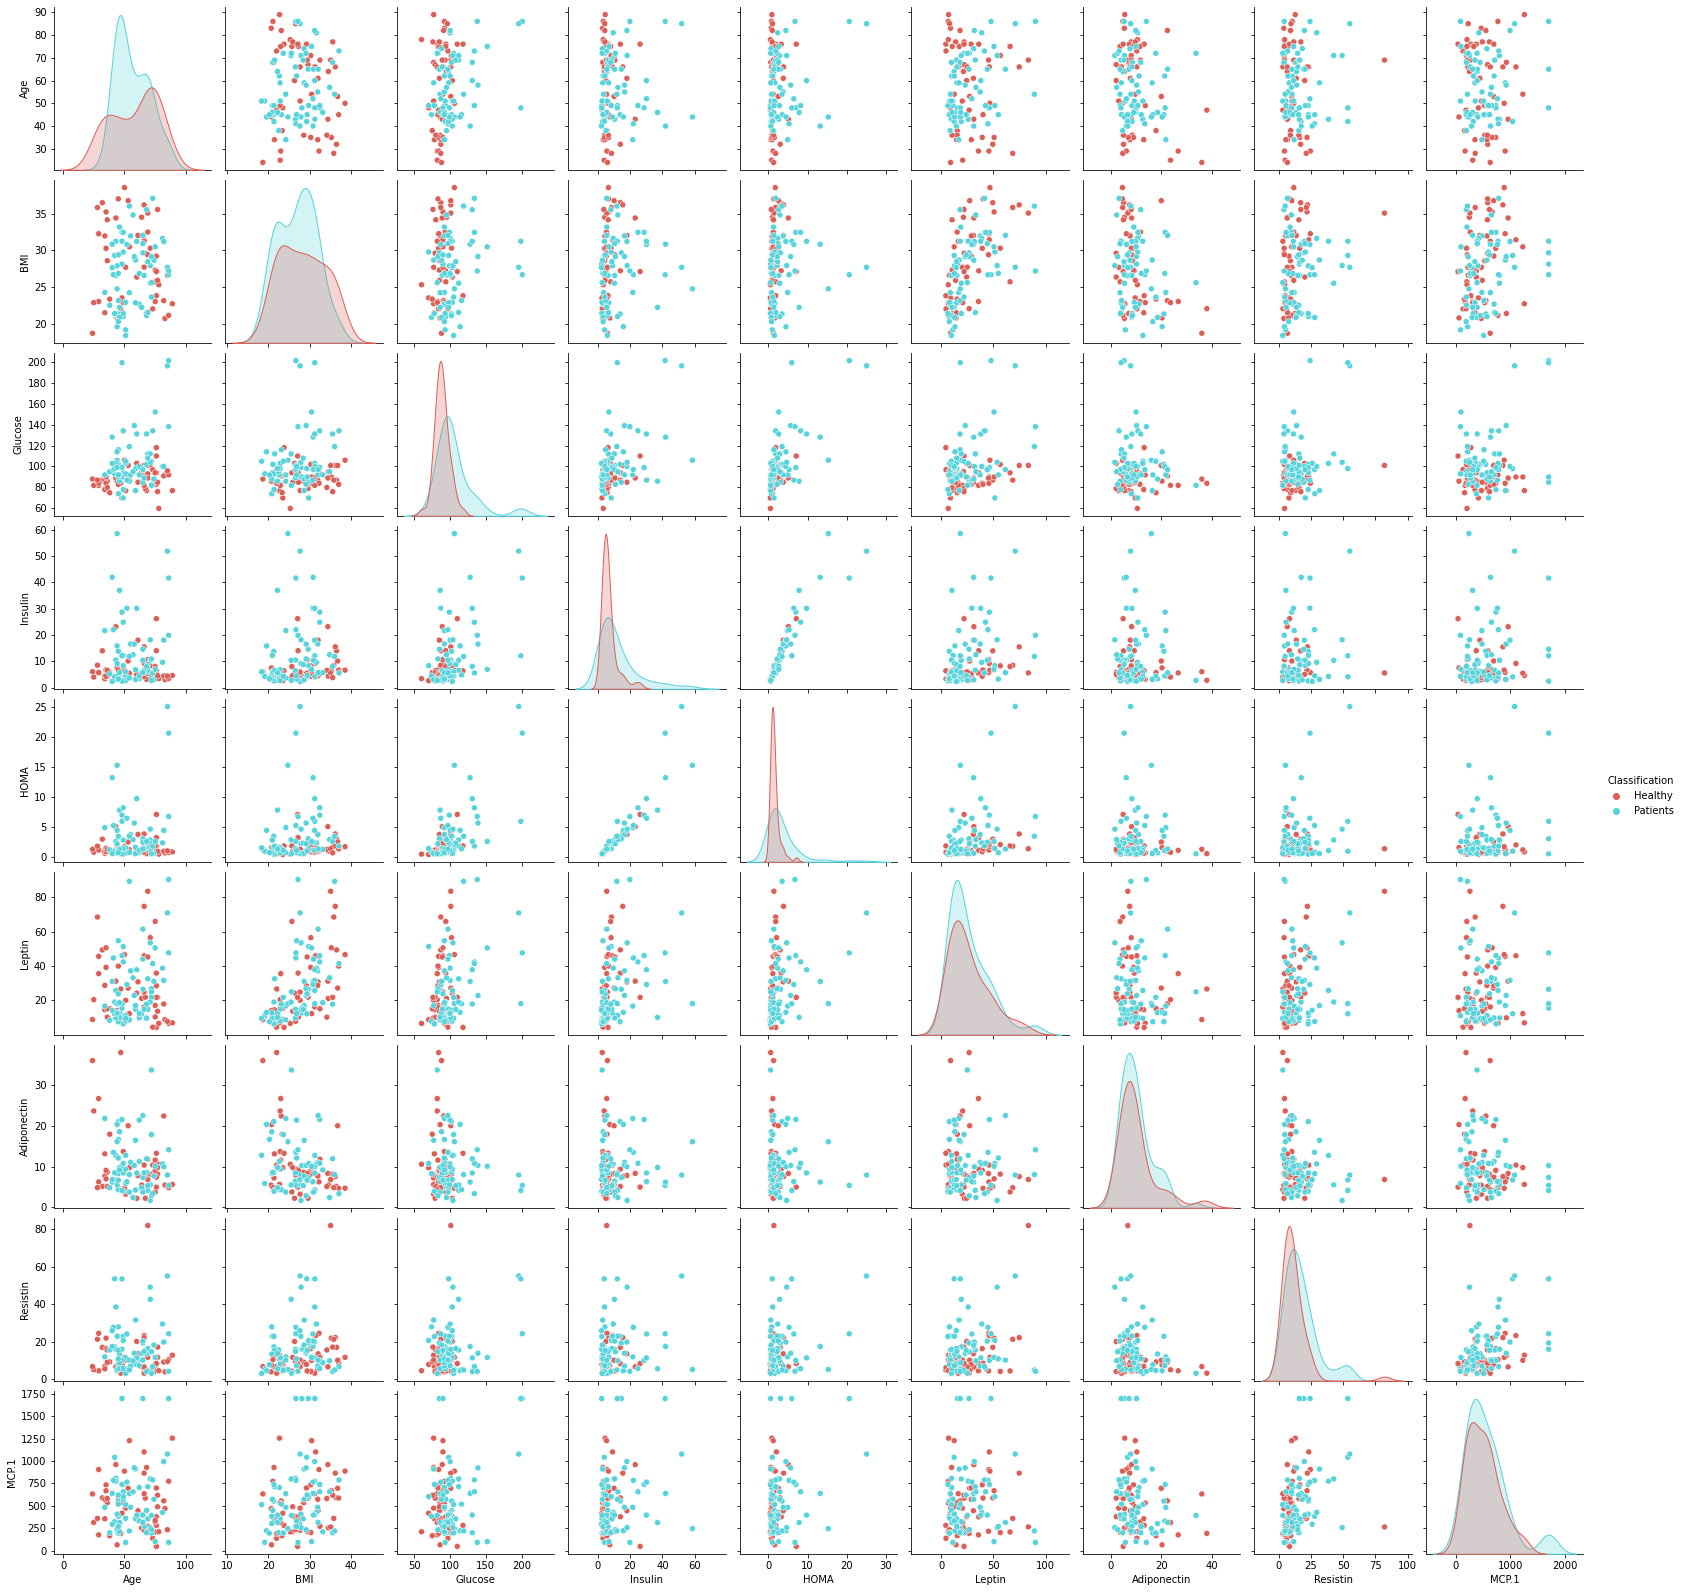

In [4]:
#pairplot
with sns.plotting_context(rc={"axes.labelsize":10}):
    pair = sns.pairplot(cancer, hue='Classification',palette="hls")




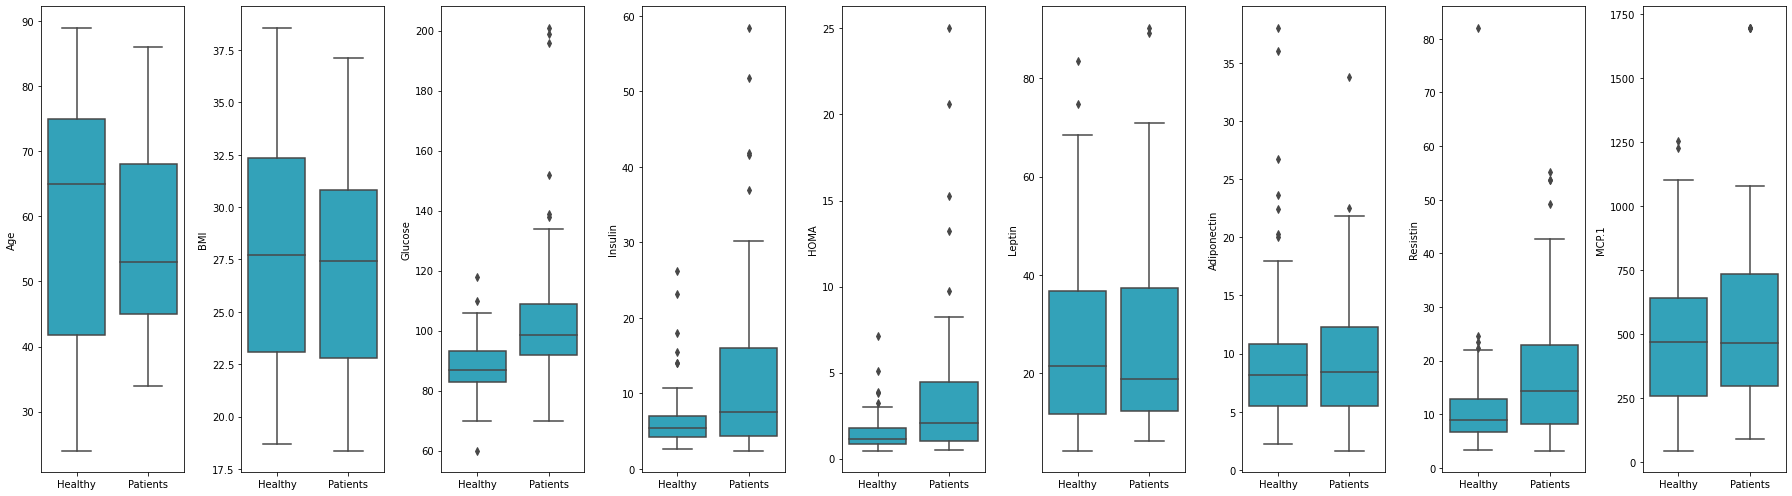

In [ ]:
#boxplot
featuresNum = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(25, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(x=list(cancer['Classification']),y=cancer[featuresNum[i]], color='#1db1cf', orient='v')
    plt.tight_layout()

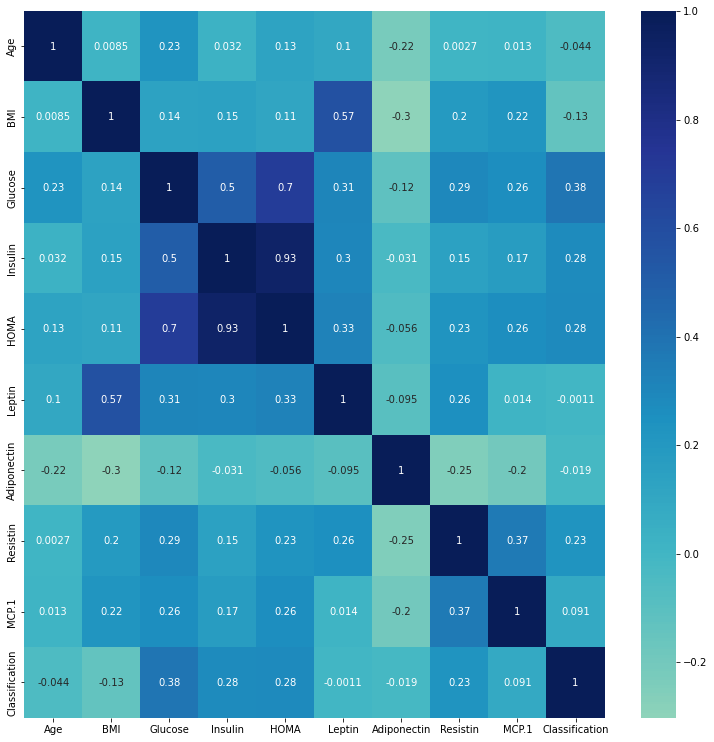

In [ ]:
#heatmap
#all
df_corr = cancer0.corr()
plt.subplots(figsize=(13, 13))
sns.heatmap(df_corr, cmap="YlGnBu",center=0, annot=True)
plt.show()

## FULL MODEL

In [5]:
X = cancer.drop(['Classification'], axis=1)
y = cancer.Classification

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=0)

#先玩一次全部變數都放進去的！

In [7]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

for i in range(3,11):
    scores = cross_val_score(KNeighborsClassifier(n_neighbors= i ), X_train,y_train, cv=10,scoring='accuracy')
    print(str('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)) + str(i)+'-nn'  )     )
#hence

Mean Accuracy: 0.514 (0.179)3-nn
Mean Accuracy: 0.445 (0.230)4-nn
Mean Accuracy: 0.521 (0.189)5-nn
Mean Accuracy: 0.483 (0.205)6-nn
Mean Accuracy: 0.504 (0.183)7-nn
Mean Accuracy: 0.446 (0.212)8-nn
Mean Accuracy: 0.492 (0.169)9-nn
Mean Accuracy: 0.504 (0.217)10-nn


In [8]:
knn = KNeighborsClassifier(n_neighbors= 5 )
knn_scores = cross_val_score(knn, X_train,y_train, cv=10,scoring='accuracy')


In [12]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA_scores = cross_val_score(LDA, X_train,y_train, cv=10,scoring='accuracy')

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA_scores = cross_val_score(QDA, X_train,y_train, cv=10,scoring='accuracy')

#logistic
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit_scores = cross_val_score(logit, X_train,y_train, cv=10,scoring='accuracy')


#SVM
from sklearn import svm
SVM_l = svm.SVC(kernel='linear') # Linear Kernel
svm_l_scores = cross_val_score(SVM_l, X_train,y_train, cv=10,scoring='accuracy')


SVM_r = svm.SVC(kernel='rbf') # rbf Kernel
svm_r_scores = cross_val_score(SVM_r, X_train,y_train, cv=10,scoring='accuracy')



#Decision_tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train,y_train, cv=10,scoring='accuracy')

#RF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rf_scores = cross_val_score(rfc, X_train,y_train, cv=10,scoring='accuracy')


#adaboost

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_scores = cross_val_score(ada, X_train,y_train, cv=10,scoring='accuracy')


#GradientBoost

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
GB_scores = cross_val_score(gb, X_train,y_train, cv=10,scoring='accuracy')



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

In [13]:
#####

all_scores = [knn_scores,LDA_scores,QDA_scores,logit_scores,svm_l_scores,svm_r_scores,dt_scores,rf_scores,ada_scores,GB_scores]
all_methods = [knn,LDA,QDA,logit,SVM_l,SVM_r,dt,rfc,ada,gb]

#建立預測table

ML_model = ['k-nn','LDA','QDA','Logistic_reg','SVM_linear','SVM_rbf','Decision_tree','Random_forest','AdaBoost','GradientBoost']
accuracy_mean = []
accuracy_sd = []

for acc in all_scores:
    accuracy_mean.append(np.mean(acc))
    accuracy_sd.append(np.std(acc))

In [ ]:
#accuracy
dict_all = {'model': ML_model, 'mean': accuracy_mean, 'sd': accuracy_sd}  
acc_table = pd.DataFrame(dict_all)
acc_table
#TRAINING SET CV

,model,mean,sd
0,k-nn,0.520909,0.188603
1,LDA,0.724545,0.130292
2,QDA,0.634545,0.081494
3,Logistic_reg,0.686364,0.117075
4,SVM_linear,0.704545,0.151207
5,SVM_rbf,0.548182,0.038794
6,Decision_tree,0.730909,0.110909
7,Random_forest,0.770909,0.090709
8,AdaBoost,0.737273,0.150011
9,GradientBoost,0.807273,0.083893


In [ ]:

acc = []
precision_P =[]
recall_P = []



for method in all_methods:
    reg = method
    reg.fit(X_train, y_train)
    print(str(method))
    pred_y = reg.predict(X_test)
    print(confusion_matrix(pred_y, y_test))
    report = classification_report(y_test, pred_y, output_dict=True, digits=3)
    print(classification_report(y_test, pred_y, digits=3))

    acc.append(accuracy_score(y_test, pred_y))
    recall_P.append(report['Patients']['recall']    )
    precision_P.append(report['Patients']['precision']    )
    

KNeighborsClassifier(n_neighbors=7)
[[1 2]
 [4 5]]
              precision    recall  f1-score   support

     Healthy      0.333     0.200     0.250         5
    Patients      0.556     0.714     0.625         7

    accuracy                          0.500        12
   macro avg      0.444     0.457     0.438        12
weighted avg      0.463     0.500     0.469        12

LinearDiscriminantAnalysis()
[[2 3]
 [3 4]]
              precision    recall  f1-score   support

     Healthy      0.400     0.400     0.400         5
    Patients      0.571     0.571     0.571         7

    accuracy                          0.500        12
   macro avg      0.486     0.486     0.486        12
weighted avg      0.500     0.500     0.500        12

QuadraticDiscriminantAnalysis()
[[4 3]
 [1 4]]
              precision    recall  f1-score   support

     Healthy      0.571     0.800     0.667         5
    Patients      0.800     0.571     0.667         7

    accuracy                          0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SVC(kernel='linear')
[[3 2]
 [2 5]]
              precision    recall  f1-score   support

     Healthy      0.600     0.600     0.600         5
    Patients      0.714     0.714     0.714         7

    accuracy                          0.667        12
   macro avg      0.657     0.657     0.657        12
weighted avg      0.667     0.667     0.667        12

SVC()
[[0 0]
 [5 7]]
              precision    recall  f1-score   support

     Healthy      0.000     0.000     0.000         5
    Patients      0.583     1.000     0.737         7

    accuracy                          0.583        12
   macro avg      0.292     0.500     0.368        12
weighted avg      0.340     0.583     0.430        12

DecisionTreeClassifier()
[[4 3]
 [1 4]]
              precision    recall  f1-score   support

     Healthy      0.571     0.800     0.667         5
    Patients      0.800     0.571     0.667         7

    accuracy                          0.667        12
   macro avg      0.686     0.6

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

RandomForestClassifier()
[[3 2]
 [2 5]]
              precision    recall  f1-score   support

     Healthy      0.600     0.600     0.600         5
    Patients      0.714     0.714     0.714         7

    accuracy                          0.667        12
   macro avg      0.657     0.657     0.657        12
weighted avg      0.667     0.667     0.667        12

AdaBoostClassifier()
[[4 3]
 [1 4]]
              precision    recall  f1-score   support

     Healthy      0.571     0.800     0.667         5
    Patients      0.800     0.571     0.667         7

    accuracy                          0.667        12
   macro avg      0.686     0.686     0.667        12
weighted avg      0.705     0.667     0.667        12

GradientBoostingClassifier()
[[3 4]
 [2 3]]
              precision    recall  f1-score   support

     Healthy      0.429     0.600     0.500         5
    Patients      0.600     0.429     0.500         7

    accuracy                          0.500        12
   macro

In [ ]:
dict_index = {'model': ML_model, 'accuracy': acc,'Patient precision':precision_P , 'Patient recall': recall_P}  
table = pd.DataFrame(dict_index)
table

,model,accuracy,Patient precision,Patient recall
0,k-nn,0.500000,0.555556,0.714286
1,LDA,0.500000,0.571429,0.571429
2,QDA,0.666667,0.800000,0.571429
3,Logistic_reg,0.666667,0.666667,0.857143
4,SVM_linear,0.666667,0.714286,0.714286
5,SVM_rbf,0.583333,0.583333,1.000000
6,Decision_tree,0.666667,0.800000,0.571429
7,Random_forest,0.666667,0.714286,0.714286
8,AdaBoost,0.666667,0.800000,0.571429
9,GradientBoost,0.500000,0.600000,0.428571


In [14]:
#feature selection

feature_numbers = list(range(1,10))
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

from sklearn.feature_selection import chi2

In [15]:
m = []
s = []
n = []
v = []

for method in all_methods:
    mean_tem = []
    sd_tem = []
    names = []
    for k in feature_numbers:
        kbest = SelectKBest(chi2, k=k)
        X_final = kbest.fit_transform(X_train,y_train)
        #透過 SelectKBest 找到最相關的變數 q 個變數，並且用 CV 決定 q (在training test 中做 k-fold)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)
        scores = cross_val_score(method, X_final, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        mean_tem.append(np.mean(scores))
        sd_tem.append(np.std(scores))
        names.append(X_train.columns[kbest.get_support(indices=True)].tolist())
        
    j =  mean_tem.index(max(mean_tem))  #max_mean_index   
    print(str(method))
    print(str('Mean Accuracy: %.3f (%.3f)' % (mean_tem[j], sd_tem[j]) + ',變數個數＝' + str(j+1))   )
    print(names[j])
    m.append(mean_tem[j])
    s.append(sd_tem[j])
    n.append(j)
    v.append(names[j])

KNeighborsClassifier()
Mean Accuracy: 0.518 (0.137),變數個數＝5
['Glucose', 'Insulin', 'HOMA', 'Resistin', 'MCP.1']
LinearDiscriminantAnalysis()
Mean Accuracy: 0.748 (0.155),變數個數＝7
['BMI', 'Glucose', 'Insulin', 'HOMA', 'Adiponectin', 'Resistin', 'MCP.1']
QuadraticDiscriminantAnalysis()
Mean Accuracy: 0.658 (0.139),變數個數＝9
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
LogisticRegression()
Mean Accuracy: 0.764 (0.130),變數個數＝6
['BMI', 'Glucose', 'Insulin', 'HOMA', 'Resistin', 'MCP.1']
SVC(kernel='linear')
Mean Accuracy: 0.763 (0.112),變數個數＝8
['BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
SVC()
Mean Accuracy: 0.548 (0.039),變數個數＝3
['Glucose', 'Resistin', 'MCP.1']
DecisionTreeClassifier()
Mean Accuracy: 0.743 (0.101),變數個數＝9
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
RandomForestClassifier()
Mean Accuracy: 0.731 (0.174),變數個數＝9
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', '

In [34]:
feature_selection = {'model': ML_model, 'mean': m, 'sd': s, 'n': n}  
feature_selection_table = pd.DataFrame(feature_selection)
feature_selection_table

,model,mean,sd,n
0,k-nn,0.481818,0.117480,8
1,LDA,0.772727,0.098333,5
2,QDA,0.652727,0.091525,3
3,Logistic_reg,0.750000,0.141844,6
4,SVM_linear,0.738182,0.143037,5
5,SVM_rbf,0.548182,0.038794,5
6,Decision_tree,0.741818,0.119101,7
7,Random_forest,0.710909,0.123033,4
8,AdaBoost,0.773636,0.167601,8
9,GradientBoost,0.818182,0.123516,8


In [16]:
#testing
acc = []
precision_P =[]
recall_P = []



for method in all_methods:
    i = all_methods.index(method)
    reg = method
    reg.fit(X_train[v[i]], y_train)
    print(str(method))
    pred_y = reg.predict(X_test[v[i]])
    print(confusion_matrix(pred_y, y_test))
    report = classification_report(y_test, pred_y, output_dict=True, digits=3)
    print(classification_report(y_test, pred_y, digits=3))

    acc.append(accuracy_score(y_test, pred_y))
    recall_P.append(report['Patients']['recall']    )
    precision_P.append(report['Patients']['precision']    )
    

KNeighborsClassifier()
[[2 3]
 [3 4]]
              precision    recall  f1-score   support

     Healthy      0.400     0.400     0.400         5
    Patients      0.571     0.571     0.571         7

    accuracy                          0.500        12
   macro avg      0.486     0.486     0.486        12
weighted avg      0.500     0.500     0.500        12

LinearDiscriminantAnalysis()
[[2 3]
 [3 4]]
              precision    recall  f1-score   support

     Healthy      0.400     0.400     0.400         5
    Patients      0.571     0.571     0.571         7

    accuracy                          0.500        12
   macro avg      0.486     0.486     0.486        12
weighted avg      0.500     0.500     0.500        12

QuadraticDiscriminantAnalysis()
[[4 3]
 [1 4]]
              precision    recall  f1-score   support

     Healthy      0.571     0.800     0.667         5
    Patients      0.800     0.571     0.667         7

    accuracy                          0.667        12

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

RandomForestClassifier()
[[3 3]
 [2 4]]
              precision    recall  f1-score   support

     Healthy      0.500     0.600     0.545         5
    Patients      0.667     0.571     0.615         7

    accuracy                          0.583        12
   macro avg      0.583     0.586     0.580        12
weighted avg      0.597     0.583     0.586        12

AdaBoostClassifier()
[[4 3]
 [1 4]]
              precision    recall  f1-score   support

     Healthy      0.571     0.800     0.667         5
    Patients      0.800     0.571     0.667         7

    accuracy                          0.667        12
   macro avg      0.686     0.686     0.667        12
weighted avg      0.705     0.667     0.667        12

GradientBoostingClassifier()
[[5 4]
 [0 3]]
              precision    recall  f1-score   support

     Healthy      0.556     1.000     0.714         5
    Patients      1.000     0.429     0.600         7

    accuracy                          0.667        12
   macro

In [17]:
dict_index = {'model': ML_model, 'accuracy': acc,'Patient precision':precision_P , 'Patient recall': recall_P}  
table = pd.DataFrame(dict_index)
table

,model,accuracy,Patient precision,Patient recall
0,k-nn,0.500000,0.571429,0.571429
1,LDA,0.500000,0.571429,0.571429
2,QDA,0.666667,0.800000,0.571429
3,Logistic_reg,0.583333,0.625000,0.714286
4,SVM_linear,0.583333,0.625000,0.714286
5,SVM_rbf,0.583333,0.583333,1.000000
6,Decision_tree,0.666667,0.800000,0.571429
7,Random_forest,0.583333,0.666667,0.571429
8,AdaBoost,0.666667,0.800000,0.571429
9,GradientBoost,0.666667,1.000000,0.428571


In [53]:
#標準化再做一次
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs_train =  sc.fit_transform(X_train)
Xs_train = pd.DataFrame(Xs_train)
Xs_train.columns =  X_train.columns

Xs_test =  sc.fit_transform(X_test)
Xs_test = pd.DataFrame(Xs_test)
Xs_test.columns =  Xs_test.columns


In [36]:
#knn 
for i in range(3,11):
    scores = cross_val_score(KNeighborsClassifier(n_neighbors= i ), Xs_train, y_train, cv=10,scoring='accuracy')
    print(str('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)) + str(i)+'-nn'  )     )
#hence

Mean Accuracy: 0.734 (0.175)3-nn
Mean Accuracy: 0.732 (0.125)4-nn
Mean Accuracy: 0.772 (0.142)5-nn
Mean Accuracy: 0.695 (0.145)6-nn
Mean Accuracy: 0.781 (0.113)7-nn
Mean Accuracy: 0.741 (0.106)8-nn
Mean Accuracy: 0.723 (0.132)9-nn
Mean Accuracy: 0.722 (0.119)10-nn


In [37]:
knn = KNeighborsClassifier(n_neighbors= 7 )
knn_scores = cross_val_score(knn, Xs_train, y_train, cv=10,scoring='accuracy')

In [38]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA_scores = cross_val_score(LDA, Xs_train,y_train, cv=10,scoring='accuracy')

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA_scores = cross_val_score(QDA, Xs_train,y_train, cv=10,scoring='accuracy')

#logistic
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit_scores = cross_val_score(logit, Xs_train,y_train, cv=10,scoring='accuracy')

#SVM
from sklearn import svm
SVM_l = svm.SVC(kernel='linear') # Linear Kernel
svm_l_scores = cross_val_score(SVM_l, Xs_train,y_train, cv=10,scoring='accuracy')

SVM_r = svm.SVC(kernel='rbf') # rbf Kernel
svm_r_scores = cross_val_score(SVM_r, Xs_train,y_train, cv=10,scoring='accuracy')


#Decision_tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt_scores = cross_val_score(dt, Xs_train,y_train, cv=10,scoring='accuracy')

#RF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rf_scores = cross_val_score(rfc, Xs_train,y_train, cv=10,scoring='accuracy')

#adaboost

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_scores = cross_val_score(ada, Xs_train,y_train, cv=10,scoring='accuracy')

#GradientBoost

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
GB_scores = cross_val_score(gb, Xs_train,y_train, cv=10,scoring='accuracy')




In [39]:
#####

all_scores = [knn_scores,LDA_scores,QDA_scores,logit_scores,svm_l_scores,svm_r_scores,dt_scores,rf_scores,ada_scores,GB_scores]
all_methods = [knn,LDA,QDA,logit,SVM_l,SVM_r,dt,rfc,ada,gb]

#建立預測table

ML_model = ['k-nn','LDA','QDA','Logistic_reg','SVM_linear','SVM_rbf','Decision_tree','Random_forest','AdaBoost','GradientBoost']
accuracy_mean = []
accuracy_sd = []

for acc in all_scores:
    accuracy_mean.append(np.mean(acc))
    accuracy_sd.append(np.std(acc))

In [40]:
#accuracy
dict_all = {'model': ML_model, 'mean': accuracy_mean, 'sd': accuracy_sd}  
acc_table = pd.DataFrame(dict_all)
acc_table
#TRAINING SET CV

,model,mean,sd
0,k-nn,0.780909,0.112921
1,LDA,0.724545,0.130292
2,QDA,0.634545,0.081494
3,Logistic_reg,0.734545,0.131853
4,SVM_linear,0.713636,0.103513
5,SVM_rbf,0.780909,0.117089
6,Decision_tree,0.732727,0.116364
7,Random_forest,0.750000,0.078229
8,AdaBoost,0.737273,0.150011
9,GradientBoost,0.787273,0.094493


### 相同 acc 我要更高的 recall
不要偽陰性

In [61]:

acc = []
precision_P =[]
recall_P = []



for method in all_methods:
    reg = method
    reg.fit(Xs_train, y_train)
    print(str(method))
    pred_y = reg.predict(Xs_test)
    print(confusion_matrix(pred_y, y_test))
    report = classification_report(y_test, pred_y, output_dict=True, digits=3)
    print(classification_report(y_test, pred_y, digits=3))

    acc.append(accuracy_score(y_test, pred_y))
    recall_P.append(report['Patients']['recall']    )
    precision_P.append(report['Patients']['precision']    )
    

KNeighborsClassifier(n_neighbors=7)
[[4 1]
 [1 6]]
              precision    recall  f1-score   support

     Healthy      0.800     0.800     0.800         5
    Patients      0.857     0.857     0.857         7

    accuracy                          0.833        12
   macro avg      0.829     0.829     0.829        12
weighted avg      0.833     0.833     0.833        12

LinearDiscriminantAnalysis()
[[4 2]
 [1 5]]
              precision    recall  f1-score   support

     Healthy      0.667     0.800     0.727         5
    Patients      0.833     0.714     0.769         7

    accuracy                          0.750        12
   macro avg      0.750     0.757     0.748        12
weighted avg      0.764     0.750     0.752        12

QuadraticDiscriminantAnalysis()
[[4 2]
 [1 5]]
              precision    recall  f1-score   support

     Healthy      0.667     0.800     0.727         5
    Patients      0.833     0.714     0.769         7

    accuracy                          0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature na


DecisionTreeClassifier()
[[4 3]
 [1 4]]
              precision    recall  f1-score   support

     Healthy      0.571     0.800     0.667         5
    Patients      0.800     0.571     0.667         7

    accuracy                          0.667        12
   macro avg      0.686     0.686     0.667        12
weighted avg      0.705     0.667     0.667        12



/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



RandomForestClassifier()
[[4 4]
 [1 3]]
              precision    recall  f1-score   support

     Healthy      0.500     0.800     0.615         5
    Patients      0.750     0.429     0.545         7

    accuracy                          0.583        12
   macro avg      0.625     0.614     0.580        12
weighted avg      0.646     0.583     0.575        12



/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



AdaBoostClassifier()
[[3 2]
 [2 5]]
              precision    recall  f1-score   support

     Healthy      0.600     0.600     0.600         5
    Patients      0.714     0.714     0.714         7

    accuracy                          0.667        12
   macro avg      0.657     0.657     0.657        12
weighted avg      0.667     0.667     0.667        12

GradientBoostingClassifier()
[[3 3]
 [2 4]]
              precision    recall  f1-score   support

     Healthy      0.500     0.600     0.545         5
    Patients      0.667     0.571     0.615         7

    accuracy                          0.583        12
   macro avg      0.583     0.586     0.580        12
weighted avg      0.597     0.583     0.586        12



/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



In [62]:
dict_index = {'model': ML_model, 'accuracy': acc,'Patient precision':precision_P , 'Patient recall': recall_P}  
table = pd.DataFrame(dict_index)
table

,model,accuracy,Patient precision,Patient recall
0,k-nn,0.833333,0.857143,0.857143
1,LDA,0.750000,0.833333,0.714286
2,QDA,0.750000,0.833333,0.714286
3,Logistic_reg,0.750000,0.833333,0.714286
4,SVM_linear,0.750000,1.000000,0.571429
5,SVM_rbf,0.583333,0.625000,0.714286
6,Decision_tree,0.666667,0.800000,0.571429
7,Random_forest,0.583333,0.750000,0.428571
8,AdaBoost,0.666667,0.714286,0.714286
9,GradientBoost,0.583333,0.666667,0.571429
